In [489]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

## 1 (آ، ب، ج)

In [490]:
class HopfieldNetwork:
    def __init__(self, num_neurons):
        self.num_neurons = num_neurons
        self.weights = np.zeros((num_neurons, num_neurons))

    # Hebbian learning rule for training
    def train(self, patterns):
        num_patterns = len(patterns)
        for p in patterns:
            p = p.reshape(self.num_neurons, 1)
            self.weights += p @ p.T
        # Set diagonal to 0 (no neuron is connected to itself)
        np.fill_diagonal(self.weights, 0)
        self.weights /= num_patterns

    # Function to update state of the neurons
    def recall(self, pattern, steps=5):
        state = pattern.copy()
        for _ in range(steps):
            # Update each neuron asynchronously
            for i in range(self.num_neurons):
                net_input = np.dot(self.weights[i], state)
                state[i] = 1 if net_input >= 0 else -1
        return state

    # Energy function
    def energy(self, state):
        return -0.5 * np.sum(self.weights * np.outer(state, state))

# Convert [0,0,1,1] to [-1,-1,1,1] for Hopfield
def binary_to_bipolar(binary_pattern):
    return np.array([1 if x == 1 else -1 for x in binary_pattern])

# Convert [-1,-1,1,1] back to [0,0,1,1]
def bipolar_to_binary(bipolar_pattern):
    return np.array([1 if x == 1 else 0 for x in bipolar_pattern])

# Define the pattern [0, 0, 1, 1] and convert it to bipolar
pattern = binary_to_bipolar([0, 0, 1, 1])
hopfield_net = HopfieldNetwork(num_neurons=4)
hopfield_net.train([pattern])
test_pattern1 = binary_to_bipolar([0, 0, 1, 0])  # A noisy version of the pattern
recalled_pattern1 = hopfield_net.recall(test_pattern1)
recalled_pattern_binary1 = bipolar_to_binary(recalled_pattern1)
print("Recalled pattern:", recalled_pattern_binary1)
energy1 = hopfield_net.energy(recalled_pattern1)
print("Energy of recalled state:", energy1)

# Define the pattern [-1, -1, 1, 1]
print('--------------------------------------------')
pattern = np.array([-1, -1, 1, 1])
hopfield_net = HopfieldNetwork(num_neurons=4)
hopfield_net.train([pattern])
test_pattern = np.array([-1, -1, 1, -1])  # A noisy version of the pattern
print("Recalling pattern...")
recalled_pattern = hopfield_net.recall(test_pattern)
print("Recalled pattern:", recalled_pattern)
energy = hopfield_net.energy(recalled_pattern)
print("Energy of recalled state:", energy)

# Define the patterns [1, 1, -1, -1] and [-1, -1, 1, 1]
print('--------------------------------------------')
pattern1 = np.array([1, 1, -1, -1])
pattern2 = np.array([-1, -1, 1, 1])
hopfield_net = HopfieldNetwork(num_neurons=4)
hopfield_net.train([pattern1, pattern2])
test_pattern = np.array([1, 1, -1, 1])  # A noisy version of pattern1
print("Recalling pattern...")
recalled_pattern = hopfield_net.recall(test_pattern)
print("Recalled pattern:", recalled_pattern)
energy = hopfield_net.energy(recalled_pattern)
print("Energy of recalled state:", energy)


Recalled pattern: [0 0 1 1]
Energy of recalled state: -6.0
--------------------------------------------
Recalling pattern...
Recalled pattern: [-1 -1  1  1]
Energy of recalled state: -6.0
--------------------------------------------
Recalling pattern...
Recalled pattern: [ 1  1 -1 -1]
Energy of recalled state: -6.0


## 1 (د)

In [491]:
# Given weight matrix
W = np.array([[0,  0,  1, -1],
              [1,  0,  1, -1],
              [1,  1,  0, -1],
              [-1, -1, -1, 0]])

hopfield_net = HopfieldNetwork(W.shape[0])

# Start from a random initial state to extract the stored pattern
initial_state = np.array([-1, -1, -1, -1])  # Example of a random starting state

print("Initial state:", initial_state)

# Recall the stored pattern
recalled_pattern = hopfield_net.recall(initial_state)

print("Recalled pattern:", recalled_pattern)

# Calculate energy of the recalled state
energy = hopfield_net.energy(recalled_pattern)
print("Energy of recalled state:", energy)

Initial state: [-1 -1 -1 -1]
Recalled pattern: [1 1 1 1]
Energy of recalled state: -0.0


Original and Recalled Patterns for letter B:


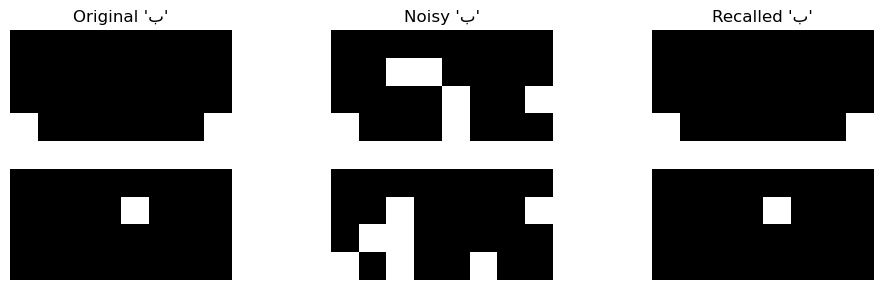

Original and Recalled Patterns for letter D:


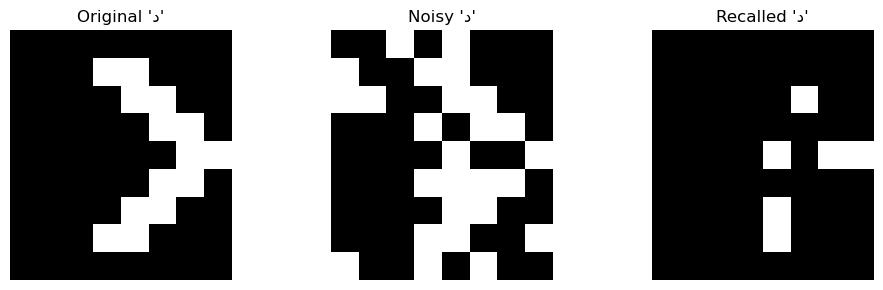

Original and Recalled Patterns for letter K:


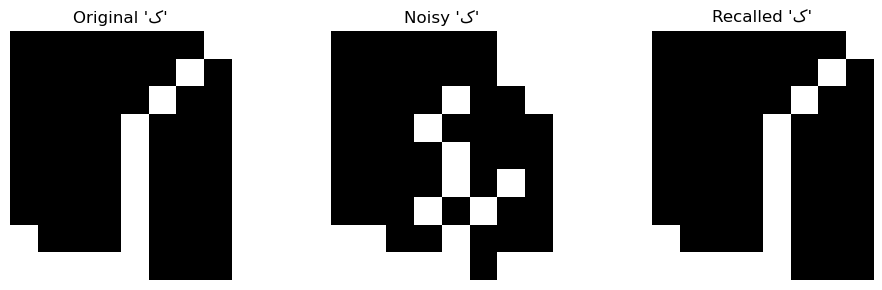

In [492]:
# Step 1: Define Hopfield network
class HopfieldNetwork:
    def __init__(self, num_neurons):
        self.num_neurons = num_neurons
        self.weights = np.zeros((num_neurons, num_neurons))  # Weight matrix initialization

    def train(self, patterns):
        """ Train the Hopfield network using Hebbian learning rule """
        for p in patterns:
            p = p.reshape(-1, 1)  # Reshape pattern as a column vector
            self.weights += np.dot(p, p.T)  # Hebbian learning
        np.fill_diagonal(self.weights, 0)  # No self-connections

    def recall(self, pattern, steps=50):
        """ Recall a pattern by running the network """
        output = pattern.copy()
        for _ in range(steps):
            for i in range(self.num_neurons):
                net_input = np.dot(self.weights[i], output)
                output[i] = 1 if net_input >= 0 else -1
        return output

    def add_noise(self, pattern, noise_level=0.2):
        noisy_pattern = pattern.copy()
        num_flips = int(len(noisy_pattern) * noise_level)
        
        # Select random indices to flip
        flip_indices = random.sample(range(len(noisy_pattern)), num_flips)
        
        # Flip the selected indices
        for idx in flip_indices:
            noisy_pattern[idx] *= -1  # Flip the bit (1 to -1 or -1 to 1)
        
        return noisy_pattern

# Step 2: Define letter patterns (Here we use simplified binary arrays to represent letters)
def create_letter_patterns():
    # Letter 'ب' (B) - A 5x5 representation
    letter_B = np.array([
        [0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0],
        [1,0,0,0,0,0,0,1],
        [1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0],
        [0,0,0,0,1,0,0,0],
        [0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0]
    ])

    # Letter 'د' (D) - A 5x5 representation
    letter_D = np.array([
        [0,0,0,0,0,0,0,0],
        [0,0,0,1,1,0,0,0],
        [0,0,0,0,1,1,0,0],
        [0,0,0,0,0,1,1,0],
        [0,0,0,0,0,0,1,1],
        [0,0,0,0,0,1,1,0],
        [0,0,0,0,1,1,0,0],
        [0,0,0,1,1,0,0,0],
        [0,0,0,0,0,0,0,0]
    ])

    # Letter 'ک' (K) - A 5x5 representation
    letter_K = np.array([
        [0,0,0,0,0,0,0,1],
        [0,0,0,0,0,0,1,0],
        [0,0,0,0,0,1,0,0],
        [0,0,0,0,1,0,0,0],
        [0,0,0,0,1,0,0,0],
        [0,0,0,0,1,0,0,0],
        [0,0,0,0,1,0,0,0],
        [1,0,0,0,1,0,0,0],
        [1,1,1,1,1,0,0,0]
        

    ])

    # Convert to bipolar (-1, 1)
    letter_B = letter_B * 2 - 1
    letter_D = letter_D * 2 - 1
    letter_K = letter_K * 2 - 1

    return letter_B.flatten(), letter_D.flatten(), letter_K.flatten()

# Step 3: Store the letters in the Hopfield network
letter_B, letter_D, letter_K = create_letter_patterns()
letters = np.array([letter_B, letter_D, letter_K])

num_neurons = len(letter_B) 
hopfield_net = HopfieldNetwork(num_neurons=num_neurons)
hopfield_net.train(letters)

# Step 4: Add noise to the patterns (20% noise)
noisy_B = hopfield_net.add_noise(letter_B, noise_level=0.2)
noisy_D = hopfield_net.add_noise(letter_D, noise_level=0.2)
noisy_K = hopfield_net.add_noise(letter_K, noise_level=0.2)

# Step 5: Recall the patterns from the noisy inputs
recalled_B = hopfield_net.recall(noisy_B)
recalled_D = hopfield_net.recall(noisy_D)
recalled_K = hopfield_net.recall(noisy_K)

# Step 6: Function to display patterns
def display_pattern(patterns, titles, shape=(9, 8)):
    plt.figure(figsize=(10, 3))  # Create a figure with appropriate size for subplots
    for i in range(len(patterns)):
        plt.subplot(1, len(patterns), i+1)  # Adjust the number of subplots dynamically
        plt.imshow(patterns[i].reshape(shape), cmap='gray')  # Reshape to 9x8 for the letters
        plt.title(titles[i])  # Add the title for each subplot
        plt.axis('off')  # Hide the axis for better display
    
    plt.tight_layout()  # Adjust spacing to avoid overlap
    plt.show()  # Show all subplots together

# Step 7: Display original, noisy, and recalled patterns for 'B', 'D', and 'K'
print("Original and Recalled Patterns for letter B:")
display_pattern([letter_B, noisy_B, recalled_B], ["Original 'ب'", "Noisy 'ب'", "Recalled 'ب'"])

print("Original and Recalled Patterns for letter D:")
display_pattern([letter_D, noisy_D, recalled_D], ["Original 'د'", "Noisy 'د'", "Recalled 'د'"])

print("Original and Recalled Patterns for letter K:")
display_pattern([letter_K, noisy_K, recalled_K], ["Original 'ک'", "Noisy 'ک'", "Recalled 'ک'"])


# Practice

# 1

Original and Recalled Patterns for letter B:


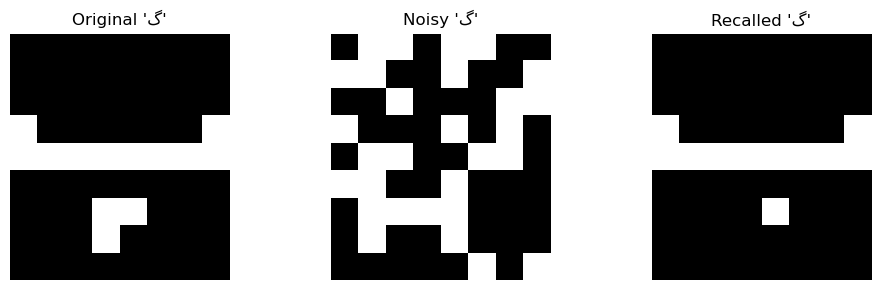

Original and Recalled Patterns for letter D:


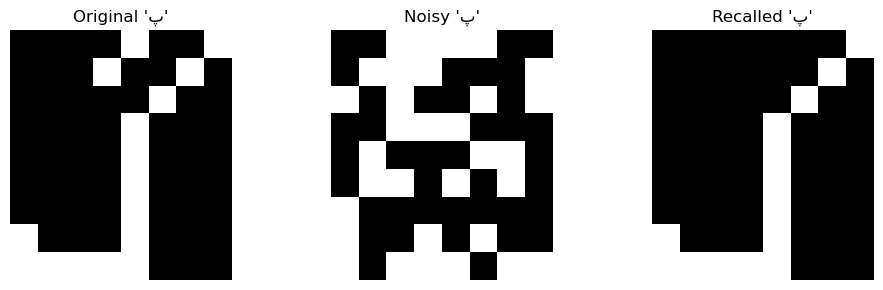

In [493]:
letter_g = np.array([
    [0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,1],
    [1,1,1,1,1,1,1,1],
    [0,0,0,0,0,0,0,0],
    [0,0,0,1,1,0,0,0],
    [0,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,0]
])
letter_p = np.array([
    [0,0,0,0,1,0,0,1],
    [0,0,0,1,0,0,1,0],
    [0,0,0,0,0,1,0,0],
    [0,0,0,0,1,0,0,0],
    [0,0,0,0,1,0,0,0],
    [0,0,0,0,1,0,0,0],
    [0,0,0,0,1,0,0,0],
    [1,0,0,0,1,0,0,0],
    [1,1,1,1,1,0,0,0]
])

# Convert to bipolar (-1, 1)
letter_g = (letter_g * 2 - 1).flatten()
letter_p = (letter_p * 2 - 1).flatten()

letters = np.array([letter_g, letter_p])

num_neurons = len(letter_p) 
hopfield_hopfield_netnet = HopfieldNetwork(num_neurons=num_neurons)
hopfield_net.train(letters)

# Step 4: Add noise to the patterns (20% noise)
noisy_g = hopfield_net.add_noise(letter_g, noise_level=0.4)
noisy_p = hopfield_net.add_noise(letter_p, noise_level=0.4)

# Step 5: Recall the patterns from the noisy inputs
recalled_g = hopfield_net.recall(noisy_g)
recalled_p = hopfield_net.recall(noisy_p)

print("Original and Recalled Patterns for letter B:")
display_pattern([letter_g, noisy_g, recalled_g], ["Original 'گ'", "Noisy 'گ'", "Recalled 'گ'"])

print("Original and Recalled Patterns for letter D:")
display_pattern([letter_p, noisy_p, recalled_p], ["Original 'پ'", "Noisy 'پ'", "Recalled 'پ'"])


<div dir='rtl'>
نمیتواند بازیابی کند.
</div>

# 4

## make dataset

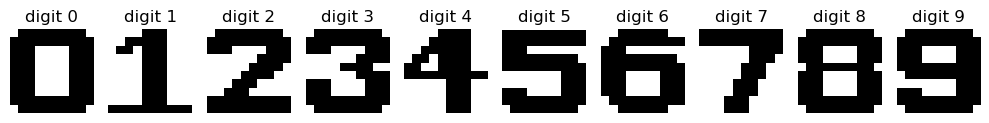

In [494]:
digit_0 = np.array([
  [0,1,1,1,1,1,1,1,1,0],
  [1,1,1,1,1,1,1,1,1,1],
  [1,1,1,0,0,0,0,1,1,1],
  [1,1,1,0,0,0,0,1,1,1],
  [1,1,1,0,0,0,0,1,1,1],
  [1,1,1,0,0,0,0,1,1,1],
  [1,1,1,0,0,0,0,1,1,1],
  [1,1,1,0,0,0,0,1,1,1],
  [1,1,1,1,1,1,1,1,1,1],
  [0,1,1,1,1,1,1,1,1,0]
])

digit_1 = np.array([
  [0,0,0,0,1,1,1,0,0,0],
  [0,0,1,1,1,1,1,0,0,0],
  [0,1,1,0,1,1,1,0,0,0],
  [0,0,0,0,1,1,1,0,0,0],
  [0,0,0,0,1,1,1,0,0,0],
  [0,0,0,0,1,1,1,0,0,0],
  [0,0,0,0,1,1,1,0,0,0],
  [0,0,0,0,1,1,1,0,0,0],
  [0,0,0,0,1,1,1,0,0,0],
  [1,1,1,1,1,1,1,1,1,1]
])

digit_2 = np.array([
  [0,1,1,1,1,1,1,1,1,0],
  [1,1,1,1,1,1,1,1,1,1],
  [1,1,1,0,0,0,0,1,1,1],
  [0,0,0,0,0,0,1,1,1,1],
  [0,0,0,0,0,1,1,1,1,0],
  [0,0,0,0,1,1,1,1,0,0],
  [0,0,0,1,1,1,0,0,0,0],
  [0,0,1,1,1,0,0,0,0,0],
  [1,1,1,1,1,1,1,1,1,1],
  [1,1,1,1,1,1,1,1,1,1]
])

digit_3 = np.array([
  [0,1,1,1,1,1,1,1,1,0],
  [1,1,1,1,1,1,1,1,1,1],
  [1,1,1,0,0,0,0,1,1,1],
  [0,0,0,0,0,0,1,1,1,1],
  [0,0,0,0,1,1,1,1,0,0],
  [0,0,0,0,0,0,1,1,1,1],
  [1,1,1,0,0,0,0,1,1,1],
  [1,1,1,0,0,0,0,1,1,1],
  [1,1,1,1,1,1,1,1,1,1],
  [0,1,1,1,1,1,1,1,1,0]
])

digit_4 = np.array([
  [0,0,0,0,1,1,1,1,0,0],
  [0,0,0,1,1,1,1,1,0,0],
  [0,0,1,1,1,1,1,1,0,0],
  [0,1,1,0,1,1,1,1,0,0],
  [1,1,0,0,1,1,1,1,0,0],
  [1,1,1,1,1,1,1,1,1,1],
  [0,0,0,0,0,1,1,1,0,0],
  [0,0,0,0,0,1,1,1,0,0],
  [0,0,0,0,0,1,1,1,0,0],
  [0,0,0,0,0,1,1,1,0,0]
])

digit_5 = np.array([
  [1,1,1,1,1,1,1,1,1,1],
  [1,1,1,1,1,1,1,1,1,1],
  [1,1,1,0,0,0,0,0,0,0],
  [1,1,1,1,1,1,1,1,1,0],
  [1,1,1,1,1,1,1,1,1,1],
  [0,0,0,0,0,0,0,1,1,1],
  [0,0,0,0,0,0,0,1,1,1],
  [1,1,1,0,0,0,0,1,1,1],
  [1,1,1,1,1,1,1,1,1,1],
  [0,1,1,1,1,1,1,1,1,0]
])

digit_6 = np.array([
  [0,0,1,1,1,1,1,1,0,0],
  [0,1,1,1,1,1,1,1,1,1],
  [1,1,1,0,0,0,0,0,0,0],
  [1,1,1,1,1,1,1,1,1,0],
  [1,1,1,1,1,1,1,1,1,1],
  [1,1,1,0,0,0,0,1,1,1],
  [1,1,1,0,0,0,0,1,1,1],
  [1,1,1,0,0,0,0,1,1,1],
  [0,1,1,1,1,1,1,1,1,1],
  [0,0,1,1,1,1,1,1,0,0]
])

digit_7 = np.array([
  [1,1,1,1,1,1,1,1,1,1],
  [1,1,1,1,1,1,1,1,1,1],
  [0,0,0,0,0,0,1,1,1,1],
  [0,0,0,0,0,0,1,1,1,0],
  [0,0,0,0,0,1,1,1,0,0],
  [0,0,0,0,0,1,1,1,0,0],
  [0,0,0,0,1,1,1,0,0,0],
  [0,0,0,0,1,1,1,0,0,0],
  [0,0,0,1,1,1,0,0,0,0],
  [0,0,0,1,1,1,0,0,0,0]
])

digit_8 = np.array([
  [0,1,1,1,1,1,1,1,1,0],
  [1,1,1,1,1,1,1,1,1,1],
  [1,1,1,0,0,0,0,1,1,1],
  [1,1,1,0,0,0,0,1,1,1],
  [0,1,1,1,1,1,1,1,1,0],
  [1,1,1,0,0,0,0,1,1,1],
  [1,1,1,0,0,0,0,1,1,1],
  [1,1,1,0,0,0,0,1,1,1],
  [1,1,1,1,1,1,1,1,1,1],
  [0,1,1,1,1,1,1,1,1,0]
])

digit_9 = np.array([
  [0,1,1,1,1,1,1,1,1,0],
  [1,1,1,1,1,1,1,1,1,1],
  [1,1,1,0,0,0,0,1,1,1],
  [1,1,1,0,0,0,0,1,1,1],
  [1,1,1,1,1,1,1,1,1,1],
  [0,1,1,1,1,1,1,1,1,1],
  [0,0,0,0,0,0,0,1,1,1],
  [1,1,1,0,0,0,0,1,1,1],
  [1,1,1,1,1,1,1,1,1,1],
  [0,1,1,1,1,1,1,1,1,0]
])

digit_0 = -(digit_0 * 2 - 1)
digit_1 = -(digit_1 * 2 - 1)
digit_2 = -(digit_2 * 2 - 1)
digit_3 = -(digit_3 * 2 - 1)
digit_4 = -(digit_4 * 2 - 1)
digit_5 = -(digit_5 * 2 - 1)
digit_6 = -(digit_6 * 2 - 1)
digit_7 = -(digit_7 * 2 - 1)
digit_8 = -(digit_8 * 2 - 1)
digit_9 = -(digit_9 * 2 - 1)

plt.figure(figsize=(10, 3))  # Create a figure with appropriate size for subplots
for i in range(10):
    plt.subplot(1, 10, i+1)  # Adjust the number of subplots dynamically
    plt.imshow(np.array(eval(f"digit_{i}")).reshape(10, 10), cmap='gray')  # Reshape to 9x8 for the letters
    plt.title(f'digit {i}')  # Add the title for each subplot
    plt.axis('off')  # Hide the axis for better display

plt.tight_layout()  # Adjust spacing to avoid overlap
plt.show()  # Show all subplots together

### train Hopfild net


Original and Recalled Patterns for digit 0:


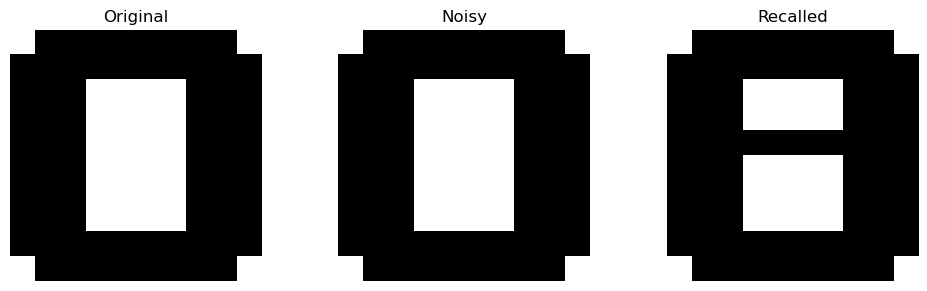

Original and Recalled Patterns for digit 1:


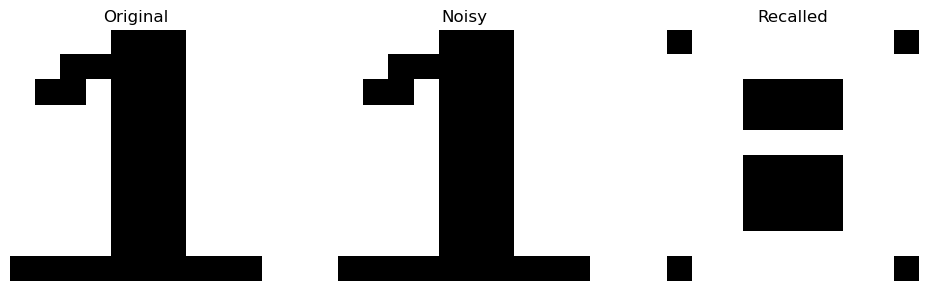

Original and Recalled Patterns for digit 2:


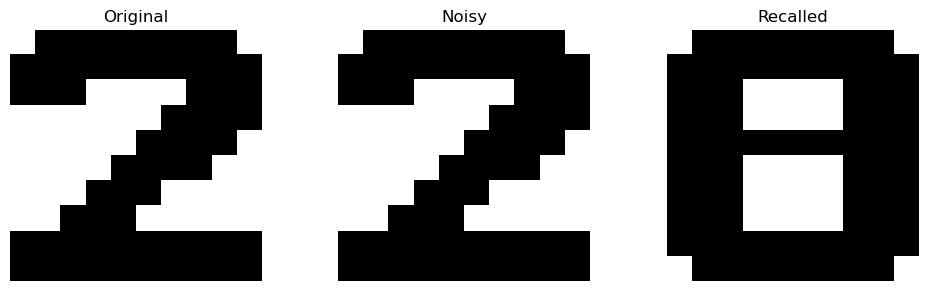

Original and Recalled Patterns for digit 3:


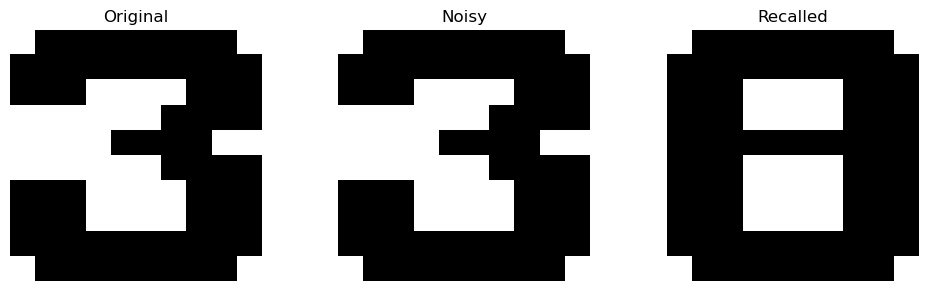

Original and Recalled Patterns for digit 4:


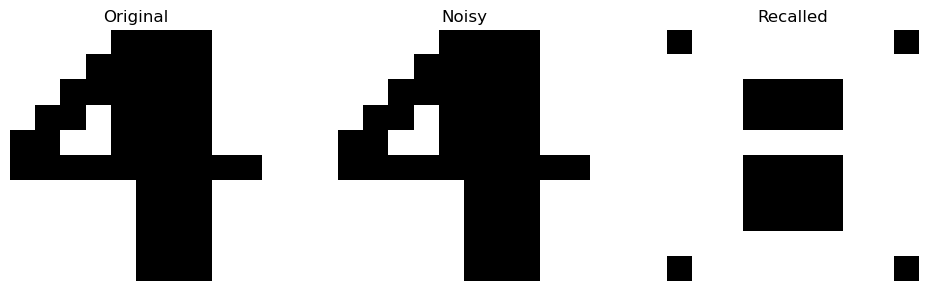

Original and Recalled Patterns for digit 5:


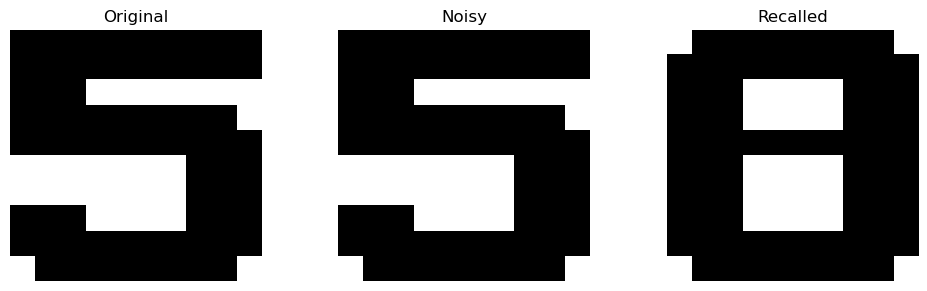

Original and Recalled Patterns for digit 6:


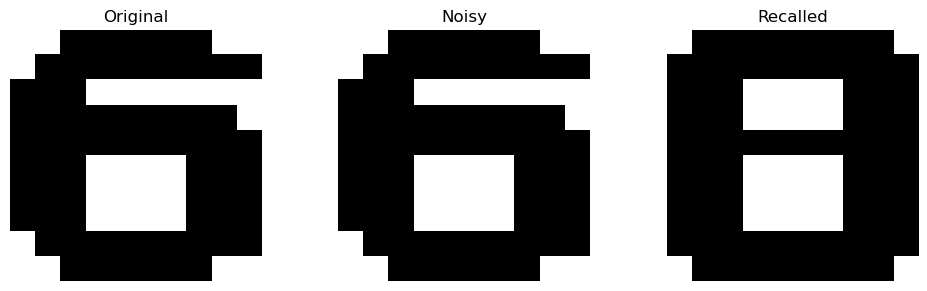

Original and Recalled Patterns for digit 7:


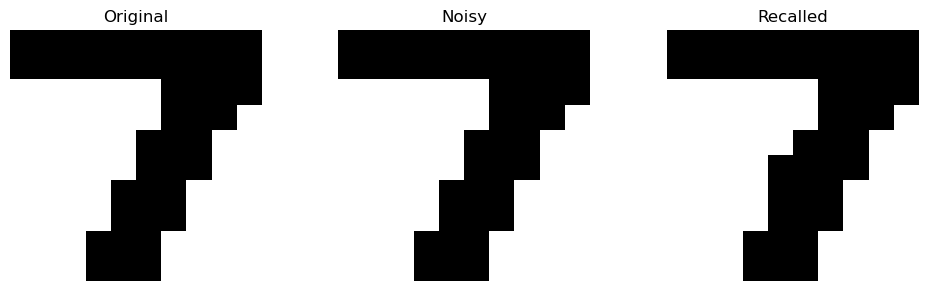

Original and Recalled Patterns for digit 8:


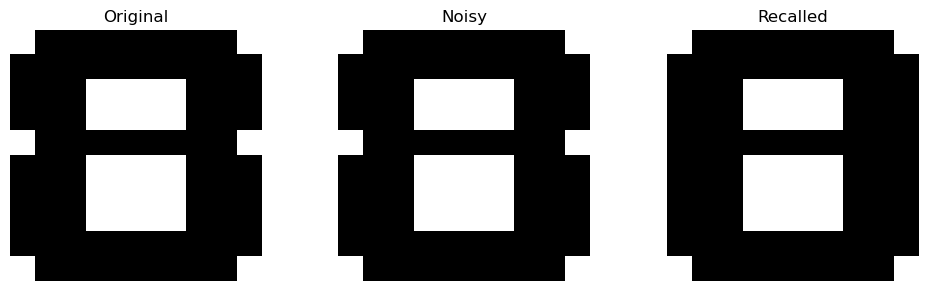

Original and Recalled Patterns for digit 9:


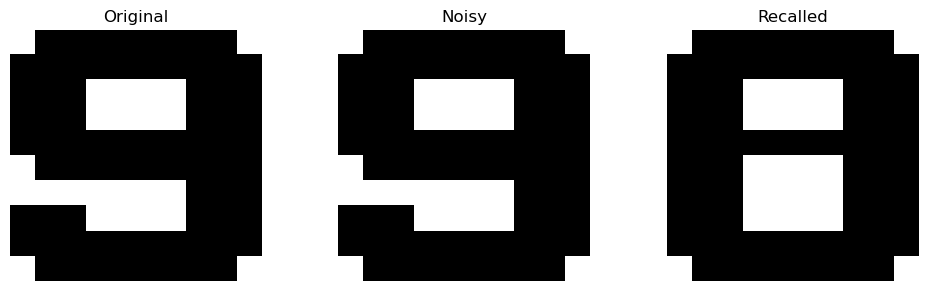

In [495]:
digits = []
for i in range(10):
    digits.append(eval(f'digit_{i}').flatten())

num_neurons = digits[0].shape[0]
hopfield_net = HopfieldNetwork(num_neurons=num_neurons)
hopfield_net.train(digits)

noisy_digits = []
for i in range(10):
    noisy_digits.append(hopfield_net.add_noise(digits[i], noise_level=0.0))

recalled_digits = []
for i in range(10):
    recalled_digits.append(hopfield_net.recall(noisy_digits[i]))

for i in range(10):
    print(f"Original and Recalled Patterns for digit {i}:")
    display_pattern([digits[i], noisy_digits[i], recalled_digits[i]], ["Original", "Noisy", "Recalled"], (10,10))


## improve dataset

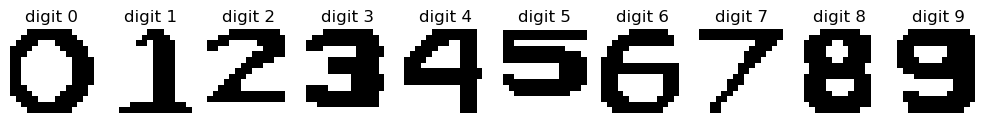

In [496]:
digit_0 = np.array([
  [0,0,0,1,1,1,1,1,1,1,1,0,0,0,0],
  [0,0,1,1,1,1,1,1,1,1,1,1,0,0,0],
  [0,1,1,1,1,0,0,0,1,1,1,1,1,0,0],
  [1,1,1,1,0,0,0,0,0,1,1,1,1,1,0],
  [1,1,1,0,0,0,0,0,0,0,1,1,1,1,0],
  [1,1,0,0,0,0,0,0,0,0,0,1,1,1,1],
  [1,1,0,0,0,0,0,0,0,0,0,1,1,1,1],
  [1,1,0,0,0,0,0,0,0,0,0,1,1,1,1],
  [1,1,0,0,0,0,0,0,0,0,0,1,1,1,1],
  [1,1,0,0,0,0,0,0,0,0,0,1,1,1,1],
  [1,1,1,0,0,0,0,0,0,0,1,1,1,1,0],
  [1,1,1,1,0,0,0,0,0,1,1,1,1,1,0],
  [0,1,1,1,1,0,0,0,1,1,1,1,1,0,0],
  [0,0,1,1,1,1,1,1,1,1,1,1,0,0,0],
  [0,0,0,1,1,1,1,1,1,1,1,0,0,0,0]
])


digit_1 = np.array([
  [0,0,0,0,0,0,0,1,1,1,0,0,0,0,0],
  [0,0,0,0,0,0,1,1,1,1,1,0,0,0,0],
  [0,0,0,0,0,1,1,0,1,1,1,1,0,0,0],
  [0,0,0,0,0,0,0,0,1,1,1,1,0,0,0],
  [0,0,0,0,0,0,0,0,1,1,1,1,0,0,0],
  [0,0,0,0,0,0,0,0,1,1,1,1,0,0,0],
  [0,0,0,0,0,0,0,0,1,1,1,1,0,0,0],
  [0,0,0,0,0,0,0,0,1,1,1,1,0,0,0],
  [0,0,0,0,0,0,0,0,1,1,1,1,0,0,0],
  [0,0,0,0,0,0,0,0,1,1,1,1,0,0,0],
  [0,0,0,0,0,0,0,0,1,1,1,1,0,0,0],
  [0,0,0,0,0,0,0,0,1,1,1,1,0,0,0],
  [0,0,0,0,0,0,0,0,1,1,1,1,0,0,0],
  [0,0,0,0,1,1,1,1,1,1,1,1,1,1,0],
  [0,0,1,1,1,1,1,1,1,1,1,1,1,1,1]
])



digit_2 = np.array([
  [0,0,0,0,1,1,1,1,1,1,1,1,1,0,0],
  [0,0,1,1,1,1,1,1,1,1,1,1,1,1,0],
  [1,1,1,1,0,0,0,0,0,1,1,1,1,1,0],
  [1,1,0,0,0,0,0,0,0,0,1,1,1,1,0],
  [0,0,0,0,0,0,0,0,1,1,1,1,1,1,0],
  [0,0,0,0,0,0,0,1,1,1,1,1,0,0,0],
  [0,0,0,0,0,0,1,1,1,1,0,0,0,0,0],
  [0,0,0,0,0,1,1,1,0,0,0,0,0,0,0],
  [0,0,0,0,1,1,1,0,0,0,0,0,0,0,0],
  [0,0,0,1,1,1,0,0,0,0,0,0,0,0,0],
  [0,0,1,1,1,1,0,0,0,0,0,0,0,0,0],
  [0,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
  [1,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
])


digit_3 = np.array([
  [0,0,0,1,1,1,1,1,1,1,1,1,0,0,0],
  [0,1,1,1,1,1,1,1,1,1,1,1,1,0,0],
  [1,1,1,1,1,1,1,1,1,1,1,1,1,0,0],
  [1,1,1,0,0,0,0,0,0,1,1,1,1,1,0],
  [0,0,0,0,0,0,0,0,0,1,1,1,1,1,0],
  [0,0,0,0,1,1,1,1,1,1,1,1,1,0,0],
  [0,0,0,0,1,1,1,1,1,1,1,1,1,0,0],
  [0,0,0,0,1,1,1,1,1,1,1,1,1,0,0],
  [0,0,0,0,0,0,0,0,1,1,1,1,1,1,0],
  [0,0,0,0,0,0,0,0,1,1,1,1,1,1,0],
  [1,1,1,1,0,0,0,0,1,1,1,1,1,1,0],
  [1,1,1,1,1,1,1,1,1,1,1,1,1,0,0],
  [1,1,1,1,1,1,1,1,1,1,1,1,1,0,0],
  [0,0,1,1,1,1,1,1,1,1,1,1,1,0,0],
  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
])

digit_4 = np.array([
  [0,0,0,0,0,1,1,1,1,1,1,1,1,0,0],
  [0,0,0,0,1,1,1,1,1,1,1,1,1,0,0],
  [0,0,0,1,1,1,1,1,0,0,1,1,1,0,0],
  [0,0,1,1,1,1,0,0,0,0,1,1,1,0,0],
  [0,1,1,1,1,0,0,0,0,0,1,1,1,0,0],
  [1,1,1,1,0,0,0,0,0,0,1,1,1,0,0],
  [1,1,1,0,0,0,0,0,0,0,1,1,1,0,0],
  [1,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
  [1,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
  [1,1,1,1,1,1,1,1,1,1,1,1,1,0,0],
  [0,0,0,0,0,0,0,0,0,0,1,1,1,0,0],
  [0,0,0,0,0,0,0,0,0,0,1,1,1,0,0],
  [0,0,0,0,0,0,0,0,0,0,1,1,1,0,0],
  [0,0,0,0,0,0,0,0,0,0,1,1,1,0,0],
  [0,0,0,0,0,0,0,0,0,0,1,1,1,0,0]
])


digit_5 = np.array([
  [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
  [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
  [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
  [1,1,1,1,1,1,1,1,1,1,1,0,0,0,0],
  [1,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
  [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
  [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
  [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
  [1,1,0,0,0,0,0,0,0,0,1,1,1,1,1],
  [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
  [0,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
  [0,0,1,1,1,1,1,1,1,1,1,1,0,0,0],
  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
])


digit_6 = np.array([
  [0,0,0,0,0,1,1,1,1,1,1,1,0,0,0],
  [0,0,0,1,1,1,1,1,1,1,1,1,1,0,0],
  [0,0,1,1,1,1,1,1,1,1,1,1,1,0,0],
  [0,1,1,1,1,0,0,0,0,0,0,0,0,0,0],
  [0,1,1,1,0,0,0,0,0,0,0,0,0,0,0],
  [1,1,1,1,0,0,0,0,0,0,0,0,0,0,0],
  [1,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
  [1,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
  [1,1,1,0,0,0,0,0,0,0,0,1,1,1,0],
  [1,1,1,0,0,0,0,0,0,0,0,1,1,1,0],
  [1,1,1,0,0,0,0,0,0,0,0,1,1,1,0],
  [1,1,1,1,0,0,0,0,0,0,0,1,1,1,0],
  [1,1,1,1,1,0,0,0,0,0,1,1,1,0,0],
  [0,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
  [0,0,1,1,1,1,1,1,1,1,1,0,0,0,0]
])


digit_7 = np.array([
  [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
  [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
  [0,0,0,0,0,0,0,0,0,0,1,1,1,1,0],
  [0,0,0,0,0,0,0,0,0,1,1,1,1,0,0],
  [0,0,0,0,0,0,0,0,1,1,1,1,0,0,0],
  [0,0,0,0,0,0,0,0,1,1,1,0,0,0,0],
  [0,0,0,0,0,0,0,1,1,1,0,0,0,0,0],
  [0,0,0,0,0,0,0,1,1,0,0,0,0,0,0],
  [0,0,0,0,0,0,1,1,0,0,0,0,0,0,0],
  [0,0,0,0,0,1,1,1,0,0,0,0,0,0,0],
  [0,0,0,0,0,1,1,0,0,0,0,0,0,0,0],
  [0,0,0,0,1,1,0,0,0,0,0,0,0,0,0],
  [0,0,0,1,1,0,0,0,0,0,0,0,0,0,0],
  [0,0,1,1,0,0,0,0,0,0,0,0,0,0,0],
  [0,0,1,1,0,0,0,0,0,0,0,0,0,0,0]
])


digit_8 = np.array([
  [0,0,0,0,1,1,1,1,1,1,1,0,0,0,0],
  [0,0,1,1,1,1,1,1,1,1,1,1,1,0,0],
  [0,1,1,1,1,1,0,0,1,1,1,1,1,0,0],
  [0,1,1,1,1,0,0,0,0,1,1,1,1,0,0],
  [0,1,1,1,1,0,0,0,0,1,1,1,1,0,0],
  [0,1,1,1,1,1,0,0,1,1,1,1,1,0,0],
  [0,0,1,1,1,1,1,1,1,1,1,1,0,0,0],
  [0,0,1,1,1,1,1,1,1,1,1,1,0,0,0],
  [0,1,1,1,1,1,1,1,1,1,1,1,1,0,0],
  [0,1,1,1,1,0,0,0,0,0,1,1,1,0,0],
  [0,1,1,1,1,0,0,0,0,0,1,1,1,0,0],
  [0,1,1,1,1,1,0,0,0,1,1,1,1,0,0],
  [0,1,1,1,1,1,1,1,1,1,1,1,1,0,0],
  [0,0,1,1,1,1,1,1,1,1,1,1,1,0,0],
  [0,0,0,1,1,1,1,1,1,1,1,0,0,0,0]
])

digit_9 = np.array([
  [0,0,1,1,1,1,1,1,1,1,1,1,1,0,0],
  [0,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
  [1,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
  [1,1,1,0,0,0,0,0,0,1,1,1,1,1,0],
  [1,1,1,0,0,0,0,0,0,1,1,1,1,1,0],
  [1,1,1,1,0,0,0,0,1,1,1,1,1,1,0],
  [1,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
  [0,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
  [0,0,0,1,1,1,1,1,1,1,1,1,1,1,0],
  [0,0,0,0,0,0,0,0,0,0,1,1,1,1,0],
  [0,0,0,0,0,0,0,0,0,0,1,1,1,1,0],
  [0,1,1,1,0,0,0,0,0,1,1,1,1,1,0],
  [0,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
  [0,0,1,1,1,1,1,1,1,1,1,1,1,0,0],
  [0,0,1,1,1,1,1,1,1,1,1,1,0,0,0]
])

digit_0 = -(digit_0 * 2 - 1)
digit_1 = -(digit_1 * 2 - 1)
digit_2 = -(digit_2 * 2 - 1)
digit_3 = -(digit_3 * 2 - 1)
digit_4 = -(digit_4 * 2 - 1)
digit_5 = -(digit_5 * 2 - 1)
digit_6 = -(digit_6 * 2 - 1)
digit_7 = -(digit_7 * 2 - 1)
digit_8 = -(digit_8 * 2 - 1)
digit_9 = -(digit_9 * 2 - 1)

plt.figure(figsize=(10, 3))  # Create a figure with appropriate size for subplots
for i in range(10):
    plt.subplot(1, 10, i+1)  # Adjust the number of subplots dynamically
    plt.imshow(np.array(eval(f"digit_{i}")).reshape(15, 15), cmap='gray')  # Reshape to 9x8 for the letters
    plt.title(f'digit {i}')  # Add the title for each subplot
    plt.axis('off')  # Hide the axis for better display

plt.tight_layout()  # Adjust spacing to avoid overlap
plt.show()  # Show all subplots together

Original and Recalled Patterns for digit 0:


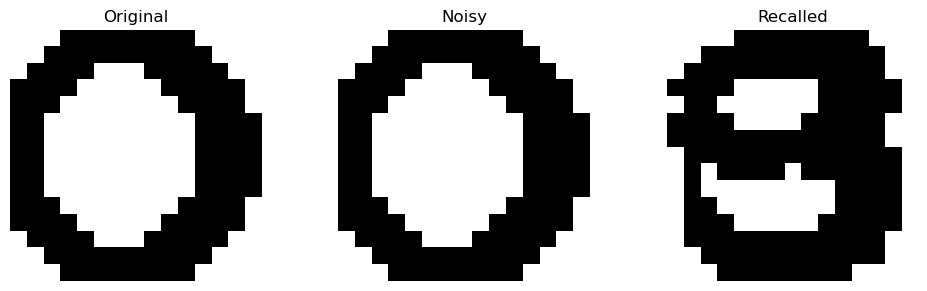

Original and Recalled Patterns for digit 1:


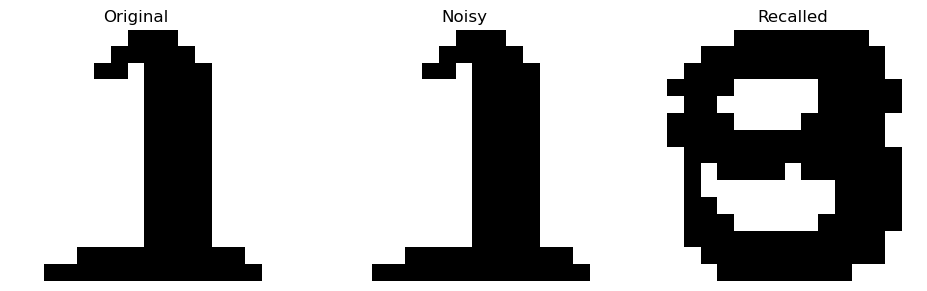

Original and Recalled Patterns for digit 2:


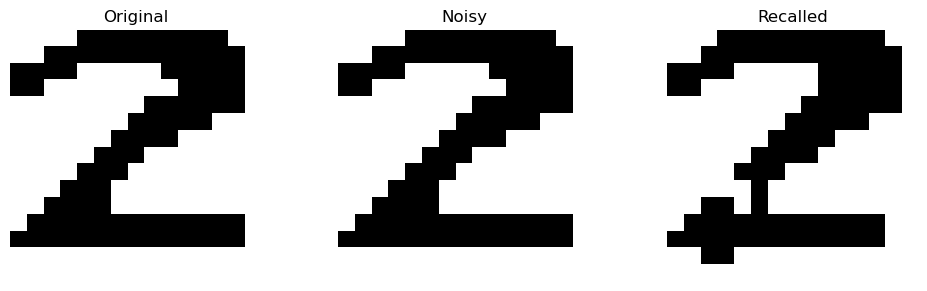

Original and Recalled Patterns for digit 3:


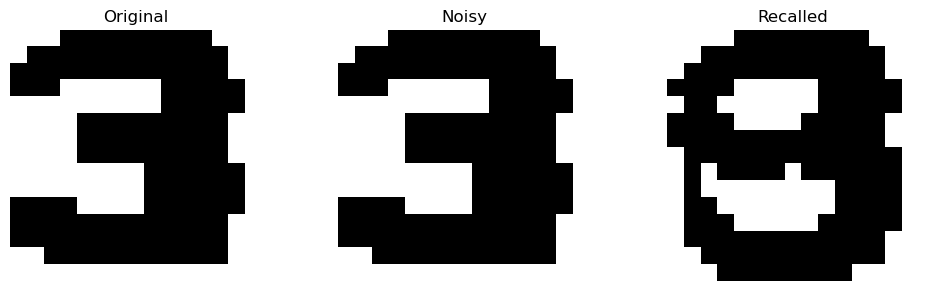

Original and Recalled Patterns for digit 4:


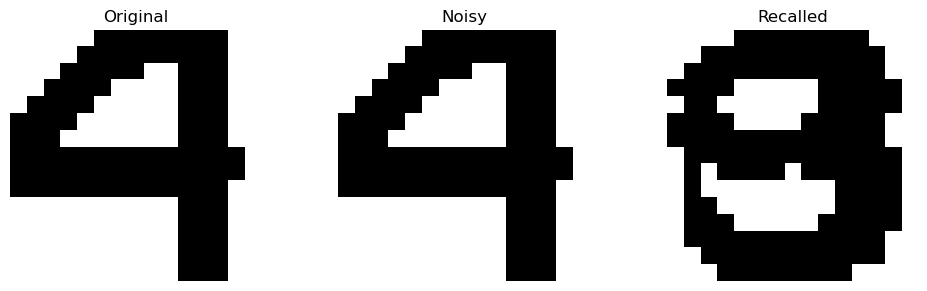

Original and Recalled Patterns for digit 5:


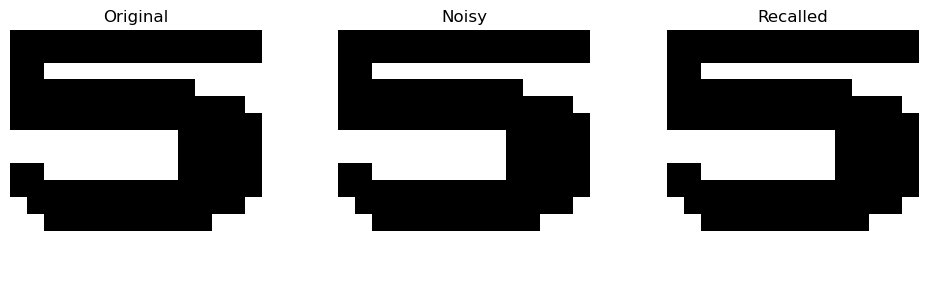

Original and Recalled Patterns for digit 6:


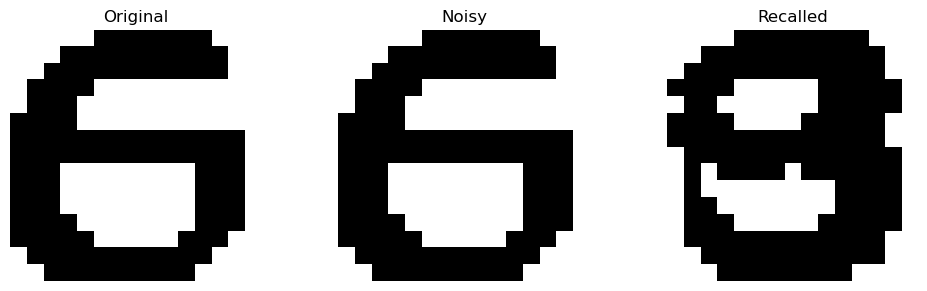

Original and Recalled Patterns for digit 7:


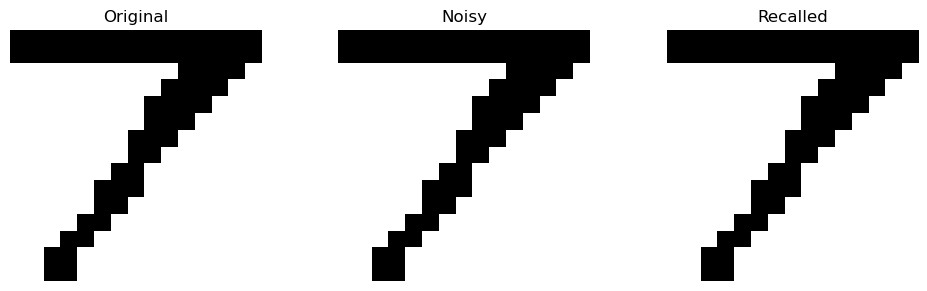

Original and Recalled Patterns for digit 8:


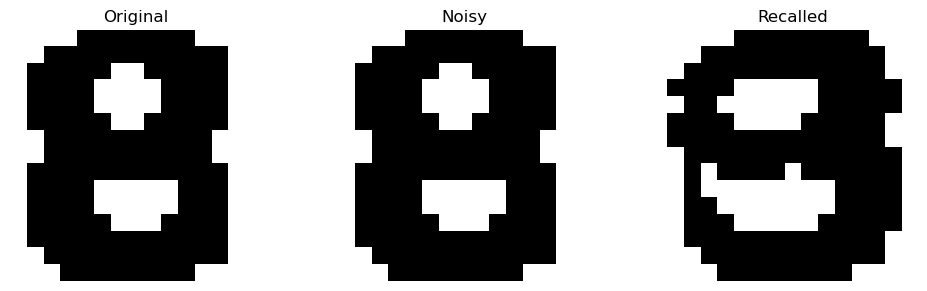

Original and Recalled Patterns for digit 9:


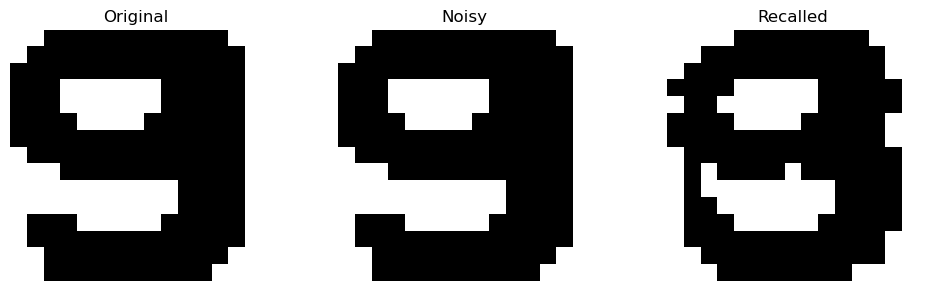

In [497]:
digits = []
for i in range(10):
    digits.append(eval(f'digit_{i}').flatten())

num_neurons = digits[0].shape[0]
hopfield_net = HopfieldNetwork(num_neurons=num_neurons)
hopfield_net.train(digits)

noisy_digits = []
for i in range(10):
    noisy_digits.append(hopfield_net.add_noise(digits[i], noise_level=0.0))

recalled_digits = []
for i in range(10):
    recalled_digits.append(hopfield_net.recall(noisy_digits[i]))

for i in range(10):
    print(f"Original and Recalled Patterns for digit {i}:")
    display_pattern([digits[i], noisy_digits[i], recalled_digits[i]], ["Original", "Noisy", "Recalled"], (15,15))


# 5

In [498]:
def create_letter_patterns():
    # Letter 'ب' (B) - A 5x5 representation
    letter_B = np.array([
        [0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0],
        [1,0,0,0,0,0,0,1],
        [1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0],
        [0,0,0,0,1,0,0,0],
        [0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0]
    ])

    # Letter 'د' (D) - A 5x5 representation
    letter_D = np.array([
        [0,0,0,0,0,0,0,0],
        [0,0,0,1,1,0,0,0],
        [0,0,0,0,1,1,0,0],
        [0,0,0,0,0,1,1,0],
        [0,0,0,0,0,0,1,1],
        [0,0,0,0,0,1,1,0],
        [0,0,0,0,1,1,0,0],
        [0,0,0,1,1,0,0,0],
        [0,0,0,0,0,0,0,0]
    ])

    # Letter 'ک' (K) - A 5x5 representation
    letter_K = np.array([
        [0,0,0,0,0,0,0,1],
        [0,0,0,0,0,0,1,0],
        [0,0,0,0,0,1,0,0],
        [0,0,0,0,1,0,0,0],
        [0,0,0,0,1,0,0,0],
        [0,0,0,0,1,0,0,0],
        [0,0,0,0,1,0,0,0],
        [1,0,0,0,1,0,0,0],
        [1,1,1,1,1,0,0,0]
        

    ])

    letter_g = np.array([
        [0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0],
        [1,0,0,0,0,0,0,1],
        [1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0],
        [0,0,0,1,1,0,0,0],
        [0,0,0,1,0,0,0,0],
        [0,0,0,0,0,0,0,0]
    ])

    letter_p = np.array([
        [0,0,0,0,1,0,0,1],
        [0,0,0,1,0,0,1,0],
        [0,0,0,0,0,1,0,0],
        [0,0,0,0,1,0,0,0],
        [0,0,0,0,1,0,0,0],
        [0,0,0,0,1,0,0,0],
        [0,0,0,0,1,0,0,0],
        [1,0,0,0,1,0,0,0],
        [1,1,1,1,1,0,0,0]
    ])

    # Convert to bipolar (-1, 1)
    letter_B = letter_B * 2 - 1
    letter_D = letter_D * 2 - 1
    letter_K = letter_K * 2 - 1
    letter_g = letter_g * 2 - 1
    letter_p = letter_p * 2 - 1

    return list(letter_B.flatten()), list(letter_D.flatten()), list(letter_K.flatten()), list(letter_g.flatten()), list(letter_p.flatten())

Accuracy of the network is 64.000000


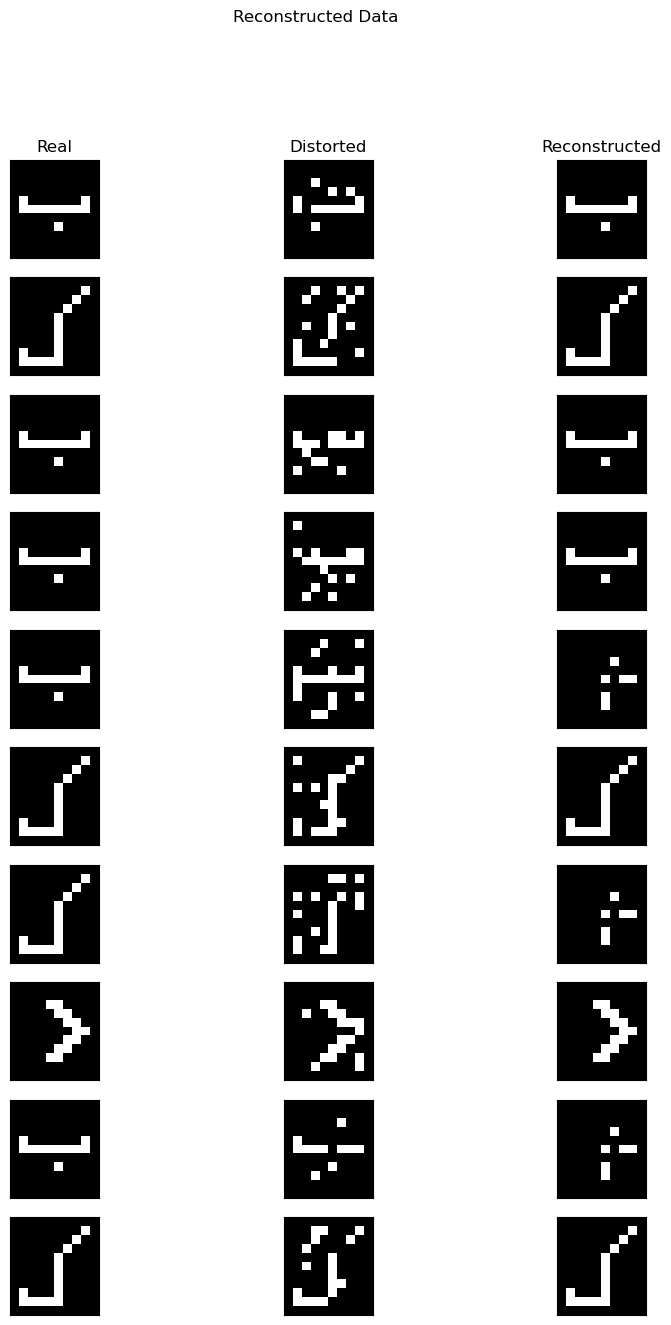

In [500]:
def plot_images(images, title, no_i_x, no_i_y=3):
    fig = plt.figure(figsize=(10, 15))
    fig.suptitle(title)  # Updated to use suptitle instead of set_window_title
    images = np.array(images).reshape(-1, 9, 8)
    images = np.pad(images, ((0, 0), (1, 1), (1, 1)), 'constant', constant_values=-1)
    for i in range(no_i_x):
        for j in range(no_i_y):
            ax = fig.add_subplot(no_i_x, no_i_y, no_i_x * j + (i + 1))
            ax.matshow(images[no_i_x * j + i], cmap="gray")
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))

            if j == 0 and i == 0:
                ax.set_title("Real")
            elif j == 0 and i == 1:
                ax.set_title("Distorted")
            elif j == 0 and i == 2:
                ax.set_title("Reconstructed")

letter_B, letter_D, letter_K, letter_g, letter_p = create_letter_patterns()

perfect_data = {
    "b": letter_B,
    "d": letter_D,
    "k": letter_K,
    "g": letter_g,
    "p": letter_p
}

n_train = 3
n_test = 100

n_train_disp = 10
distort = 0.1
n_neurons = 9*8

train_data = [np.array(d) for d in perfect_data.values()][:n_train]

test_data = []
for d in range(n_test):
    r_i = np.random.randint(0, n_train)
    base_pattern = np.array(train_data[r_i])
    noise = 1 * (np.random.random(base_pattern.shape) > distort)
    np.place(noise, noise == 0, -1)
    noisy_pattern = np.multiply(base_pattern, noise)
    test_data.append((base_pattern, noisy_pattern))

def train(neu, training_data):
    w = np.zeros([neu, neu])
    for data in training_data:
        w += np.outer(data, data)
    for diag in range(neu):
        w[diag][diag] = 0
    return w

def retrieve_pattern(weights, data, steps=10):
    res = np.array(data)

    for _ in range(steps):
        for i in range(len(res)):
            raw_v = np.dot(weights[i], res)
            if raw_v > 0:
                res[i] = 1
            else:
                res[i] = -1
    return res

def test(weights, testing_data):
    success = 0.0

    output_data = []

    for data in testing_data:
        true_data = data[0]
        noisy_data = data[1]
        predicted_data = retrieve_pattern(weights, noisy_data)
        if np.array_equal(true_data, predicted_data):
            success += 1.0
        output_data.append([true_data, noisy_data, predicted_data])

    return (success / len(testing_data)), output_data

W = train(n_neurons, train_data)

accuracy, op_imgs = test(W, test_data)

print("Accuracy of the network is %f" % (accuracy * 100))

plot_images(op_imgs, "Reconstructed Data", n_train_disp)
plt.show()
